In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## 1. knowing and cleaning the data

In [2]:
df = pd.read_csv('./7554/SimpleTest/5.csv')
df

,X,Y,Pressure,TiltX,TiltY,Time
0,608.351079801363,833.323017,0.107164,-3848.0,-644.0,00:02.7272871
1,608.877699503407,833.165031,0.107164,-3848.0,-644.0,00:02.7429109
2,608.877699503407,833.165031,0.099107,-3848.0,-644.0,00:02.7585749
3,609.03568541402,833.323017,0.107652,-3959.0,-670.0,00:02.7741475
4,608.719713592794,833.586326,0.129381,-4059.0,-694.0,00:02.7898665
...,...,...,...,...,...,...
500,686.132809793279,654.061670,0.507561,-3717.0,1573.0,00:16.4733589
501,686.132809793279,654.061670,0.490227,-3717.0,1573.0,00:16.4891290
502,686.448781614505,653.903684,0.478019,-3717.0,1573.0,00:16.5046050
503,Time Elapsed till drawing started: 00:02.7272871,NaN,NaN,NaN,NaN,NaN


In [3]:
last_rows = df.iloc[-2:,:]
df = df.iloc[:-2,:]
print(df.columns)
dict = {'X':'X', ' Y':'Y', ' Pressure':'Pressure', ' TiltX':'TiltX', ' TiltY':'TiltY', ' Time':'Time'}
df.rename(columns=dict,inplace=True)
df

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,608.351079801363,833.323017,0.107164,-3848.0,-644.0,00:02.7272871
1,608.877699503407,833.165031,0.107164,-3848.0,-644.0,00:02.7429109
2,608.877699503407,833.165031,0.099107,-3848.0,-644.0,00:02.7585749
3,609.03568541402,833.323017,0.107652,-3959.0,-670.0,00:02.7741475
4,608.719713592794,833.586326,0.129381,-4059.0,-694.0,00:02.7898665
...,...,...,...,...,...,...
498,686.132809793279,654.061670,0.507561,-3717.0,1573.0,00:16.4421005
499,686.132809793279,654.061670,0.507561,-3717.0,1573.0,00:16.4578282
500,686.132809793279,654.061670,0.507561,-3717.0,1573.0,00:16.4733589
501,686.132809793279,654.061670,0.490227,-3717.0,1573.0,00:16.4891290


In [4]:
df.dtypes

X            object
Y           float64
Pressure    float64
TiltX       float64
TiltY       float64
Time         object
dtype: object

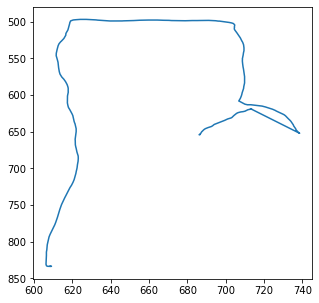

In [5]:
df['X']= df['X'].astype('float64')
df['Time'] = pd.to_datetime(df['Time'], format='%M:%S.%f')

fig, ax = plt.subplots(figsize=(5,5))
plt.plot(df['X'],df['Y'])

## The shape was printed upside down - we will fix it:
plt.gca().invert_yaxis()

plt.show()
warnings.filterwarnings("ignore")

## 2. Producing new columns:
#### a. delta x,y - The distance of every point from the previous point.
#### b. delta time - The time difference between each point and the previous point

In [6]:
df['delta_x_y']=0.0
df['delta_time']=0.0

for i in df.index:
    q=[df['X'][i],df['Y'][i]]
    if (i==0):
        t=0.0
        p=[0,0]
    else:
        t=df['Time'][i]-df['Time'][i-1]
        p=[df['X'][i-1],df['Y'][i-1]]
    
    df['delta_x_y'][i]=math.dist(p, q)
    df['delta_time'][i]=t
df['delta_x_y'][0]=0.0



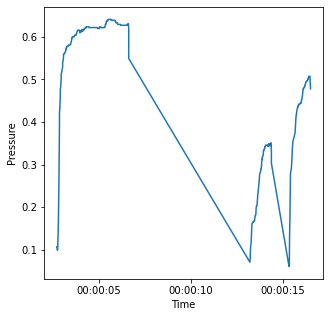

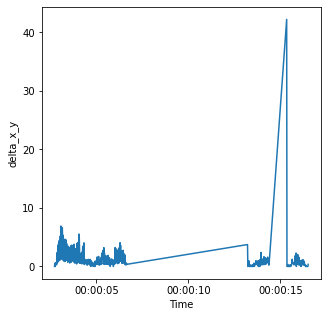

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
plt.plot(df['Time'],df['Pressure'])
ax.set_xlabel('Time')
ax.set_ylabel('Pressure')
plt.show()

fig, ax2 = plt.subplots(figsize=(5,5))
plt.plot(df['Time'],df['delta_x_y'])
ax2.set_xlabel('Time')
ax2.set_ylabel('delta_x_y')
plt.show()

In [8]:
std_x_y = df['delta_x_y'].std()
std_pressure = df['Pressure'].std()

count_min_pressure=0
count_max_delta_x_y=0
min_pressure_point=[]
max_delta_x_y_point=[]

rows= df.shape[0]-1
print("number rows:" ,rows)
for i in range(1,rows):
    if ((df['Pressure'][i]<df['Pressure'][i-1]) & (df['Pressure'][i]<df['Pressure'][i+1])):
        i=i+1
        count_min_pressure+=1
        min_pressure_point.append(i-1)
        
for j in range(1,rows):
    if ((df['delta_x_y'][j]>df['delta_x_y'][j-1]) & (df['delta_x_y'][j]>df['delta_x_y'][j+1])):
        j=j+1
        count_max_delta_x_y+=1
        max_delta_x_y_point.append(j-1)
        
print("number of min_pressure_point:", count_min_pressure-1,)

print("number of max_delta_x_y_point:", count_max_delta_x_y-1)

intersection = [value for value in min_pressure_point if value in max_delta_x_y_point]
print("intersection:", intersection)
print("\nnumber of hand raising:", len(intersection))

number rows: 502
number of min_pressure_point: 4
number of max_delta_x_y_point: 170
intersection: [113, 332]

number of hand raising: 2


## 2. find amount of lines

In [41]:
def slope(x1, y1, x2, y2):
    return (float)(y2-y1)/(x2-x1)

df['slope']=0.0
df['delta_slope']=0.0
for i in df.index:
    if (i==0):
        sl=0
    else:
        if ((df['X'][i-1]-(df['X'][i])==0)):
            sl=0
            df['delta_slope'][i]=df['slope'][i]-df['slope'][i-1]
        else:
            sl = slope(df['X'][i-1],df['Y'][i-1],df['X'][i],df['Y'][i])
            df['delta_slope'][i]=df['slope'][i]-df['slope'][i-1]
    df['slope'][i]=sl
df

,X,Y,Pressure,TiltX,TiltY,Time,delta_x_y,delta_time,slope,delta_slope
0,608.351080,833.323017,0.107164,-3848.0,-644.0,1900-01-01 00:00:02.727287100,0.000000,0.0,0.000000,0.0
1,608.877700,833.165031,0.107164,-3848.0,-644.0,1900-01-01 00:00:02.742910900,0.549807,0 days 00:00:00.015623800,-0.300000,0.0
2,608.877700,833.165031,0.099107,-3848.0,-644.0,1900-01-01 00:00:02.758574900,0.000000,0 days 00:00:00.015664,0.000000,0.3
3,609.035685,833.323017,0.107652,-3959.0,-670.0,1900-01-01 00:00:02.774147500,0.223426,0 days 00:00:00.015572600,1.000000,0.0
4,608.719714,833.586326,0.129381,-4059.0,-694.0,1900-01-01 00:00:02.789866500,0.411303,0 days 00:00:00.015719,-0.833333,-1.0
...,...,...,...,...,...,...,...,...,...,...
498,686.132810,654.061670,0.507561,-3717.0,1573.0,1900-01-01 00:00:16.442100500,0.000000,0 days 00:00:00.015623600,0.000000,0.0
499,686.132810,654.061670,0.507561,-3717.0,1573.0,1900-01-01 00:00:16.457828200,0.000000,0 days 00:00:00.015727700,0.000000,0.0
500,686.132810,654.061670,0.507561,-3717.0,1573.0,1900-01-01 00:00:16.473358900,0.000000,0 days 00:00:00.015530700,0.000000,0.0
501,686.132810,654.061670,0.490227,-3717.0,1573.0,1900-01-01 00:00:16.489129000,0.000000,0 days 00:00:00.015770100,0.000000,0.0


array([[<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

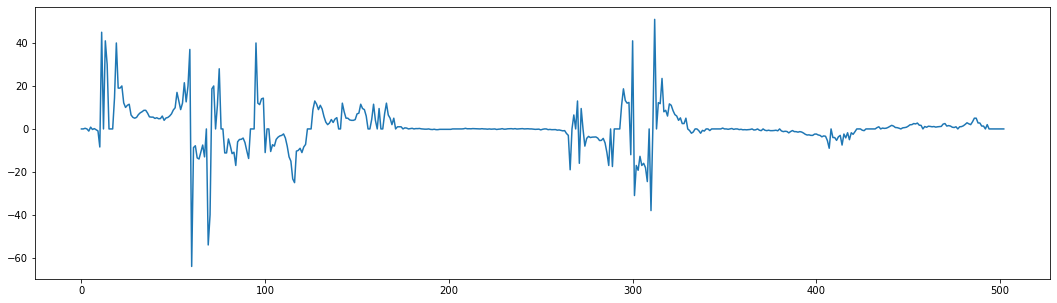

In [49]:
df["delta_slope"].plot(figsize = (40, 5), subplots=True, layout=(1, 2) , sharey=True)

In [50]:
#sns.lineplot(x="Time", y="delta_slope",data=df)

In [51]:
#sns.distplot(df['delta_slope'])